In [3]:
from IPython.display import HTML

url = "https://lstm-gru-sentimentanalysis-byluvgoel.netlify.app/"

HTML(f"""
<style>@keyframes g{{0%,100%{{background-position:0 50%}}50%{{background-position:100% 50%}}}}</style>
<div style="text-align:center;padding:20px;background:linear-gradient(135deg,#667eea,#764ba2,#667eea);background-size:200%;animation:g 4s ease infinite;border-radius:10px">
<h2 style="color:#fff;margin:0 0 5px">LSTM GRU Sentiment Analysis Demo by Luv Goel</h2><br>
<a href="{url}" target="_blank" style="display:inline-block;padding:15px 40px;background:#fff;color:#667eea;font-weight:bold;font-size:16px;border-radius:10px;box-shadow:0 5px 15px rgba(0,0,0,.3);text-decoration:none;transition:transform .3s" onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">Click Here to Open Website</a>
</div>
""")

In [20]:
# Install required libraries (if needed)
# !pip install tensorflow matplotlib numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, History
import time

In [3]:
# STEP 1: Load and Preprocess the IMDB Dataset
# Parameters
VOCAB_SIZE = 10000  # Top 10,000 most frequent words
MAX_LENGTH = 200    # Pad/truncate sequences to 200 words
EMBEDDING_DIM = 128 # Embedding dimension
HIDDEN_UNITS = 64   # LSTM/GRU hidden units

# Load IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Sample review length before padding: {len(X_train[0])} words")
print(f"Sample label (0=negative, 1=positive): {y_train[0]}")

# Pad sequences to same length
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH, padding='post', truncating='post')

print(f"Sample review length after padding: {X_train[0].shape}")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples: 25000
Sample review length before padding: 218 words
Sample label (0=negative, 1=positive): 1
Sample review length after padding: (200,)
Training data shape: (25000, 200)
Testing data shape: (25000, 200)


In [4]:
# STEP 2: Build LSTM Model

def create_lstm_model(vocab_size, embedding_dim, max_length, hidden_units):
    """Create LSTM-based sentiment analysis model"""
    model = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  name='embedding'),
        LSTM(hidden_units, name='lstm'),
        Dropout(0.5, name='dropout'),
        Dense(1, activation='sigmoid', name='output')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

lstm_model = create_lstm_model(VOCAB_SIZE, EMBEDDING_DIM, MAX_LENGTH, HIDDEN_UNITS)
lstm_model.summary()

# Explicitly build the model before counting parameters
lstm_model.build(input_shape=(None, MAX_LENGTH))

# Count parameters
lstm_params = lstm_model.count_params()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# STEP 3: Train LSTM Model

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
start_time = time.time()
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)
lstm_train_time = time.time() - start_time

print(f"\nLSTM Training completed in {lstm_train_time:.2f} seconds")

# Evaluate LSTM
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_accuracy*100:.2f}%")
print(f"LSTM Test Loss: {lstm_loss:.4f}")

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 385ms/step - accuracy: 0.5092 - loss: 0.6933 - val_accuracy: 0.5258 - val_loss: 0.6926
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 360ms/step - accuracy: 0.5784 - loss: 0.6740 - val_accuracy: 0.6280 - val_loss: 0.6242
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 367ms/step - accuracy: 0.6544 - loss: 0.6011 - val_accuracy: 0.5322 - val_loss: 0.6885
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 364ms/step - accuracy: 0.5461 - loss: 0.6803 - val_accuracy: 0.5600 - val_loss: 0.6731
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 362ms/step - accuracy: 0.6584 - loss: 0.5992 - val_accuracy: 0.5804 - val_loss: 0.6560

LSTM Training completed in 315.15 seconds
LSTM Test Accuracy: 62.00%
LSTM Test Loss: 0.6291


In [6]:
# STEP 4: Build GRU Model

def create_gru_model(vocab_size, embedding_dim, max_length, hidden_units):
    """Create GRU-based sentiment analysis model"""
    model = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  name='embedding'),
        GRU(hidden_units, name='gru'),
        Dropout(0.5, name='dropout'),
        Dense(1, activation='sigmoid', name='output')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

gru_model = create_gru_model(VOCAB_SIZE, EMBEDDING_DIM, MAX_LENGTH, HIDDEN_UNITS)
gru_model.summary()

# Explicitly build the model before counting parameters
gru_model.build(input_shape=(None, MAX_LENGTH))

# Count parameters
gru_params = gru_model.count_params()
print(f"\nTotal GRU Parameters: {gru_params:,}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Total GRU Parameters: 1,317,313


In [ ]:
# STEP 5: Train GRU Model

# Train the model
start_time = time.time()
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)
gru_train_time = time.time() - start_time

print(f"\nGRU Training completed in {gru_train_time:.2f} seconds")

# Evaluate GRU
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test Accuracy: {gru_accuracy*100:.2f}%")
print(f"GRU Test Loss: {gru_loss:.4f}")

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 379ms/step - accuracy: 0.5110 - loss: 0.6933 - val_accuracy: 0.5146 - val_loss: 0.6916
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 383ms/step - accuracy: 0.5684 - loss: 0.6901 - val_accuracy: 0.5904 - val_loss: 0.6711
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 385ms/step - accuracy: 0.6227 - loss: 0.6492 - val_accuracy: 0.5852 - val_loss: 0.6564
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 391ms/step - accuracy: 0.5919 - loss: 0.6549 - val_accuracy: 0.5524 - val_loss: 0.6786
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 390ms/step - accuracy: 0.6315 - loss: 0.6025 - val_accuracy: 0.6842 - val_loss: 0.6461
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 388ms/step - accuracy: 0.6902 - loss: 0.5818 - val_accuracy: 0.6640 - val_loss: 0.6373
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 387ms/step - accuracy: 0.7849 - loss: 0.4721 - val_accuracy: 0.7940 - val_loss: 0.4697
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 385ms/step - accuracy: 0.8764 - loss: 0

In [13]:
# STEP 6: Compare LSTM vs GRU

comparison = {
    'Metric': ['Test Accuracy (%)', 'Test Loss', 'Training Time (s)',
               'Parameters', 'Speed Factor'],
    'LSTM': [f"{lstm_accuracy*100:.2f}", f"{lstm_loss:.4f}",
             f"{lstm_train_time:.2f}", f"{lstm_params:,}", "1.0x"],
    'GRU': [f"{gru_accuracy*100:.2f}", f"{gru_loss:.4f}",
            f"{gru_train_time:.2f}", f"{gru_params:,}",
            f"{lstm_train_time/gru_train_time:.2f}x"]
}

print(f"\n{'Metric':<25} {'LSTM':<20} {'GRU':<20}")
print("-" * 65)
for i in range(len(comparison['Metric'])):
    print(f"{comparison['Metric'][i]:<25} {comparison['LSTM'][i]:<20} {comparison['GRU'][i]:<20}")

print("\n📊 Key Insights:")
print(f"• GRU is ~{(lstm_train_time/gru_train_time - 1)*100:.1f}% faster to train")
print(f"• GRU has {lstm_params - gru_params:,} fewer parameters")
print(f"• Accuracy difference: {abs(lstm_accuracy - gru_accuracy)*100:.2f}%")


Metric                    LSTM                 GRU                 
-----------------------------------------------------------------
Test Accuracy (%)         62.00                82.26               
Test Loss                 0.6291               0.4479              
Training Time (s)         315.15               649.94              
Parameters                1,329,473            1,317,313           
Speed Factor              1.0x                 0.48x               

📊 Key Insights:
• GRU is ~-51.5% faster to train
• GRU has 12,160 fewer parameters
• Accuracy difference: 20.27%


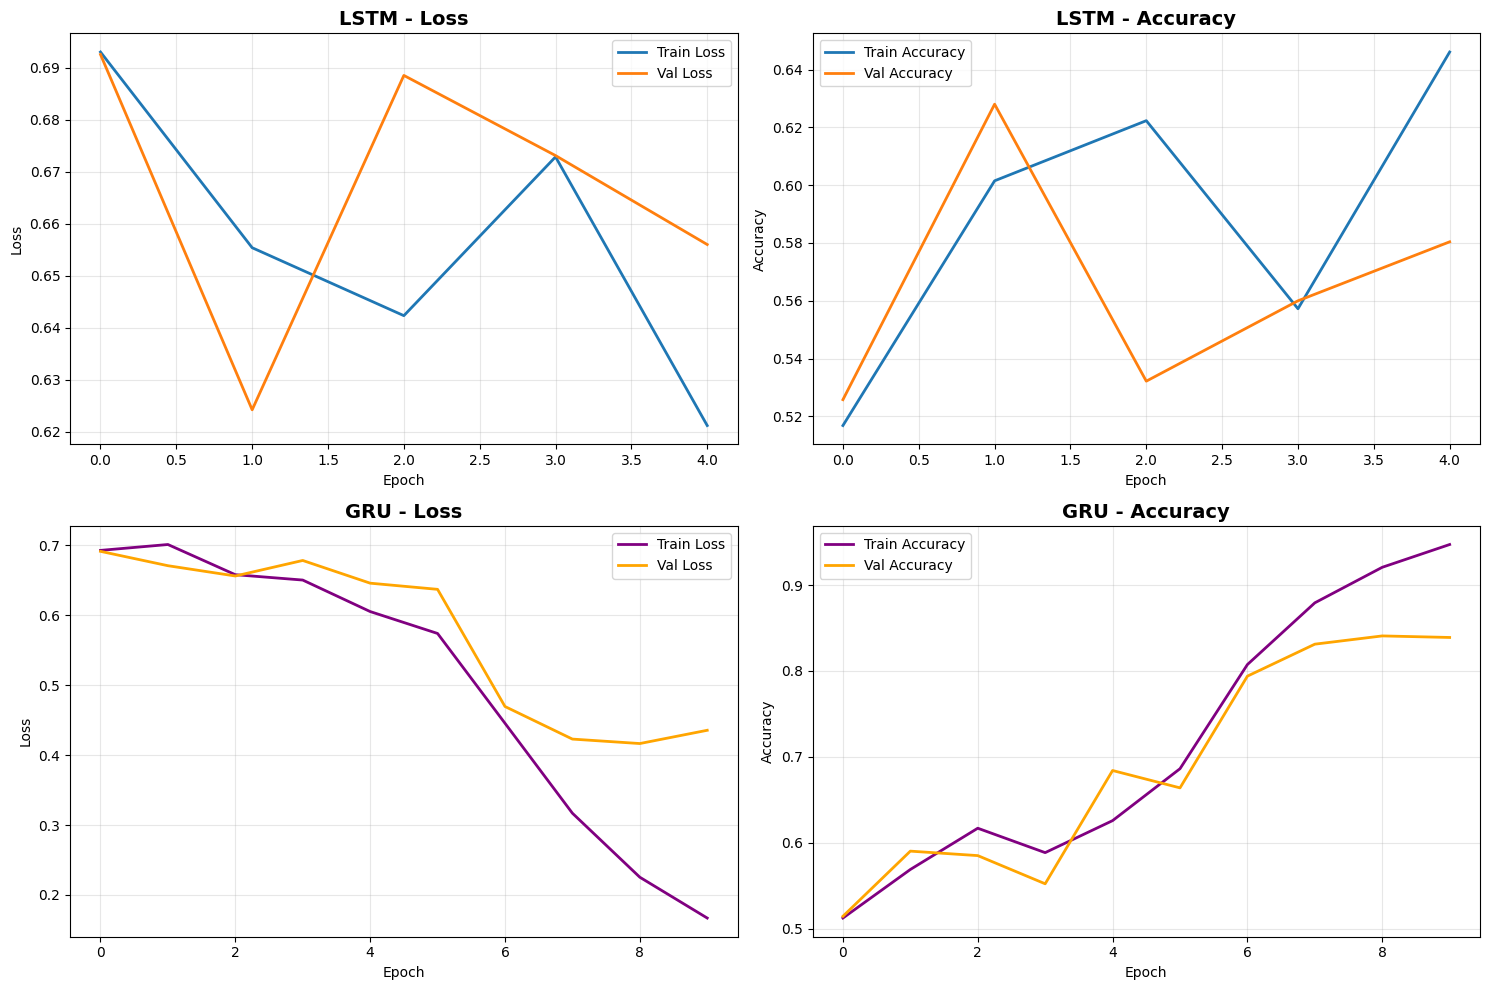

Training history plots saved as 'lstm_vs_gru_comparison.png'


In [14]:
# STEP 7: Visualize Training History

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# LSTM Loss
axes[0, 0].plot(lstm_history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(lstm_history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 0].set_title('LSTM - Loss', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# LSTM Accuracy
axes[0, 1].plot(lstm_history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 1].plot(lstm_history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 1].set_title('LSTM - Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# GRU Loss
axes[1, 0].plot(gru_history.history['loss'], label='Train Loss', linewidth=2, color='purple')
axes[1, 0].plot(gru_history.history['val_loss'], label='Val Loss', linewidth=2, color='orange')
axes[1, 0].set_title('GRU - Loss', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# GRU Accuracy
axes[1, 1].plot(gru_history.history['accuracy'], label='Train Accuracy', linewidth=2, color='purple')
axes[1, 1].plot(gru_history.history['val_accuracy'], label='Val Accuracy', linewidth=2, color='orange')
axes[1, 1].set_title('GRU - Accuracy', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_vs_gru_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Training history plots saved as 'lstm_vs_gru_comparison.png'")

In [15]:
# STEP 8: Test with Custom Reviews

# Load word index for encoding custom text
word_index = imdb.get_word_index()

def encode_text(text):
    """Encode text to sequence of integers"""
    words = text.lower().split()
    encoded = [word_index.get(word, 2) + 3 for word in words]  # 2 is UNK token
    encoded = [min(w, VOCAB_SIZE-1) for w in encoded]  # Clip to vocab size
    return encoded

def predict_sentiment(text, model, model_name):
    """Predict sentiment of given text"""
    # Encode and pad
    encoded = encode_text(text)
    padded = pad_sequences([encoded], maxlen=MAX_LENGTH, padding='post', truncating='post')

    # Predict
    prediction = model.predict(padded, verbose=0)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"\n{model_name} Model:")
    print(f"  Text: '{text}'")
    print(f"  Sentiment: {sentiment}")
    print(f"  Confidence: {confidence*100:.2f}%")
    print(f"  Score: {prediction:.4f}")

    return prediction

# Test reviews
test_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Terrible movie, waste of time and money. Very disappointing.",
    "The acting was okay but the plot was confusing and boring.",
    "Amazing cinematography and a gripping storyline. Highly recommend!",
    "Worst film I have ever seen. Complete garbage."
]

print("\nTesting custom movie reviews:\n")
for review in test_reviews:
    print("=" * 70)
    lstm_pred = predict_sentiment(review, lstm_model, "LSTM")
    gru_pred = predict_sentiment(review, gru_model, "GRU")
    print(f"  Prediction difference: {abs(lstm_pred - gru_pred)*100:.2f}%")


Testing custom movie reviews:


LSTM Model:
  Text: 'This movie was absolutely fantastic! I loved every minute of it.'
  Sentiment: Negative
  Confidence: 51.60%
  Score: 0.4840

GRU Model:
  Text: 'This movie was absolutely fantastic! I loved every minute of it.'
  Sentiment: Positive
  Confidence: 90.51%
  Score: 0.9051
  Prediction difference: 42.11%

LSTM Model:
  Text: 'Terrible movie, waste of time and money. Very disappointing.'
  Sentiment: Negative
  Confidence: 51.60%
  Score: 0.4840

GRU Model:
  Text: 'Terrible movie, waste of time and money. Very disappointing.'
  Sentiment: Negative
  Confidence: 97.56%
  Score: 0.0244
  Prediction difference: 45.95%

LSTM Model:
  Text: 'The acting was okay but the plot was confusing and boring.'
  Sentiment: Negative
  Confidence: 51.60%
  Score: 0.4840

GRU Model:
  Text: 'The acting was okay but the plot was confusing and boring.'
  Sentiment: Negative
  Confidence: 95.27%
  Score: 0.0473
  Prediction difference: 43.66%

LSTM Model:


In [16]:
# STEP 9: Model Architecture Comparison

print("\n LSTM Architecture:")
print("  • Embedding Layer: 10,000 → 128")
print("  • LSTM Layer: 64 units")
print("  • 4 Gates: Input, Forget, Cell, Output")
print("  • Dropout: 0.5")
print("  • Dense Layer: 1 unit (sigmoid)")
print(f"  • Total Parameters: {lstm_params:,}")

print("\n GRU Architecture:")
print("  • Embedding Layer: 10,000 → 128")
print("  • GRU Layer: 64 units")
print("  • 3 Gates: Reset, Update, New")
print("  • Dropout: 0.5")
print("  • Dense Layer: 1 unit (sigmoid)")
print(f"  • Total Parameters: {gru_params:,}")

print("\n Key Differences:")
print("  • LSTM has separate cell state (c_t) and hidden state (h_t)")
print("  • GRU combines them into single hidden state")
print("  • LSTM: 4 gates → more parameters, potentially better long-term memory")
print("  • GRU: 3 gates → faster training, fewer parameters, easier to train")


 LSTM Architecture:
  • Embedding Layer: 10,000 → 128
  • LSTM Layer: 64 units
  • 4 Gates: Input, Forget, Cell, Output
  • Dropout: 0.5
  • Dense Layer: 1 unit (sigmoid)
  • Total Parameters: 1,329,473

 GRU Architecture:
  • Embedding Layer: 10,000 → 128
  • GRU Layer: 64 units
  • 3 Gates: Reset, Update, New
  • Dropout: 0.5
  • Dense Layer: 1 unit (sigmoid)
  • Total Parameters: 1,317,313

 Key Differences:
  • LSTM has separate cell state (c_t) and hidden state (h_t)
  • GRU combines them into single hidden state
  • LSTM: 4 gates → more parameters, potentially better long-term memory
  • GRU: 3 gates → faster training, fewer parameters, easier to train


In [17]:
# STEP 10: Save Models

lstm_model.save('lstm_sentiment_model.h5')
gru_model.save('gru_sentiment_model.h5')

print("LSTM model saved as 'lstm_sentiment_model.h5'")
print("GRU model saved as 'gru_sentiment_model.h5'")

print("\n" + "="*70)
print(" ASSIGNMENT COMPLETED SUCCESSFULLY!")
print("="*70)
print("\n Summary:")
print(f"  • Trained both LSTM and GRU models on IMDB dataset")
print(f"  • LSTM Accuracy: {lstm_accuracy*100:.2f}%")
print(f"  • GRU Accuracy: {gru_accuracy*100:.2f}%")
print(f"  • Handled sequence padding (max length: {MAX_LENGTH})")
print(f"  • Used word embeddings (dimension: {EMBEDDING_DIM})")
print(f"  • Compared model performance and architecture")
print("\n To load saved models:")
print("   from tensorflow.keras.models import load_model")
print("   model = load_model('lstm_sentiment_model.h5')")

LSTM model saved as 'lstm_sentiment_model.h5'
GRU model saved as 'gru_sentiment_model.h5'

 ASSIGNMENT COMPLETED SUCCESSFULLY!

 Summary:
  • Trained both LSTM and GRU models on IMDB dataset
  • LSTM Accuracy: 62.00%
  • GRU Accuracy: 82.26%
  • Handled sequence padding (max length: 200)
  • Used word embeddings (dimension: 128)
  • Compared model performance and architecture

 To load saved models:
   from tensorflow.keras.models import load_model
   model = load_model('lstm_sentiment_model.h5')
